In [10]:
import pandas as pd
from IPython.display import display, HTML

data = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data)
# display(HTML(df.to_html()))
print(df)



   col1  col2
0     1     3
1     2     4


In [2]:
import numpy as np
import pandas as pd
from itertools import product
from PIL import Image

TFM_PATH = '/home/amachuca/PycharmProjects/TFM_SAI/'

def load_image(row):
    # Aquí debes proporcionar la lógica para cargar la imagen
    # Puedes usar la información de 'Usuario', 'Mano', 'Bandas', y 'Fotos' para construir la ruta de la imagen
    # Por ejemplo, si tus imágenes están en una carpeta llamada 'imagenes', podrías hacer algo como:
    ruta_imagen = (
        TFM_PATH
        + f"datasets/CASIA-Multi-Spectral-PalmprintV1/{row['Usuario']}_{row['Mano']}_{row['Bandas']}_{row['Fotos']}.jpg"
    )

    # Cargar la imagen usando Pillow
    imagen = Image.open(ruta_imagen)

    # Convertir la imagen a un array de NumPy (opcional, dependiendo de cómo quieras manejarla)
    imagen_array = np.array(imagen)

    return imagen_array


def load_casia_multi_spectral_palmprintV1():
    usuarios = [f"{i:03}" for i in range(1, 101)]
    manos = ["l", "r"]
    bandas = [460, 630, 700, 850, 940, "WHT"]
    fotos = [f"{i:02}" for i in range(1, 7)]
    # Crear el dataframe
    df = pd.DataFrame(
        product(usuarios, manos, bandas, fotos),
        columns=["Usuario", "Mano", "Bandas", "Fotos"],
    )

    df["Imagen"] = df.apply(lambda row: load_image(row), axis=1)

    print(df)


load_casia_multi_spectral_palmprintV1()

     Usuario Mano Bandas Fotos  \
0        001    l    460    01   
1        001    l    460    02   
2        001    l    460    03   
3        001    l    460    04   
4        001    l    460    05   
...      ...  ...    ...   ...   
7195     100    r    WHT    02   
7196     100    r    WHT    03   
7197     100    r    WHT    04   
7198     100    r    WHT    05   
7199     100    r    WHT    06   

                                                 Imagen  
0     [[11, 11, 10, 10, 10, 9, 9, 9, 10, 10, 10, 10,...  
1     [[11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, ...  
2     [[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ...  
3     [[18, 17, 17, 15, 14, 13, 12, 12, 9, 10, 11, 1...  
4     [[14, 14, 14, 14, 14, 14, 14, 14, 8, 9, 11, 13...  
...                                                 ...  
7195  [[10, 11, 11, 11, 10, 9, 8, 8, 9, 9, 9, 9, 9, ...  
7196  [[12, 12, 12, 11, 10, 8, 7, 6, 10, 10, 10, 10,...  
7197  [[9, 9, 9, 10, 10, 10, 11, 11, 8, 8, 8, 9, 9, ...  
7198  [[11,

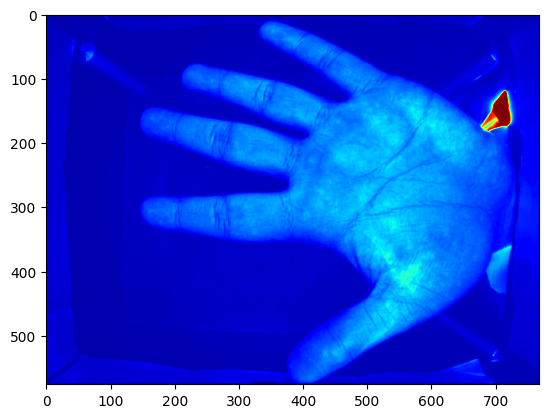

In [13]:
# First import libraries.
from PIL import Image
import matplotlib.pyplot as plt

# The folliwing line is useful in Jupyter notebook
%matplotlib inline

# Open your file image using the path
img = Image.open(TFM_PATH+"datasets/CASIA-Multi-Spectral-PalmprintV1/001_l_460_01.jpg")

# Since plt knows how to handle instance of the Image class, just input your loaded image to imshow method
plt.imshow(img,cmap='jet')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


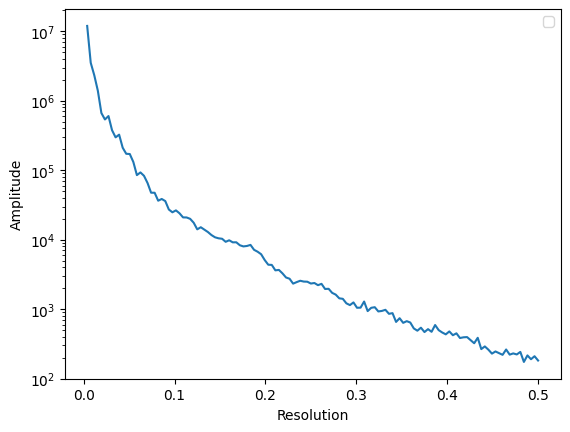

In [9]:
import numpy as np
import math
from PIL import Image


def show_amplitude_resolution(image):
    img = Image.open(image)
    img = img.resize((256, 256))  # rescale it down to (256,256) again
    img = np.asarray(img)  # Get array back
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = 20 * np.log(np.abs(fshift))
    n = int(math.ceil(img.shape[0] / 2.) * 2)
    a = np.fft.rfft(img, n, axis=0)
    a = a.real * a.real + a.imag * a.imag
    a = a.sum(axis=1) / a.shape[1]
    f = np.fft.rfftfreq(n)
    n = int(math.ceil(img.shape[1] / 2.) * 2)
    a = np.fft.rfft(img, n, axis=1)
    a = a.real * a.real + a.imag * a.imag
    a = a.sum(axis=0) / a.shape[0]
    f = np.fft.rfftfreq(n)

    plt.plot(f[1:], a[1:])
    plt.ylabel('Amplitude')
    plt.xlabel('Resolution')
    plt.yscale('log')
    plt.legend()
    plt.show()

show_amplitude_resolution(
    TFM_PATH + "datasets/CASIA-Multi-Spectral-PalmprintV1/001_l_WHT_01.jpg"
)